In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
df=pd.read_csv("cleaned_data-2.csv")

In [56]:
df.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
df.shape


(614, 13)

In [58]:
df.columns


Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             614 non-null    object 
 2   married            614 non-null    object 
 3   dependents         614 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      614 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         614 non-null    float64
 9   loan_amount_term   614 non-null    float64
 10  credit_history     614 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [60]:
df['loan_status'].value_counts()


,count
loan_status,
Y,422
N,192


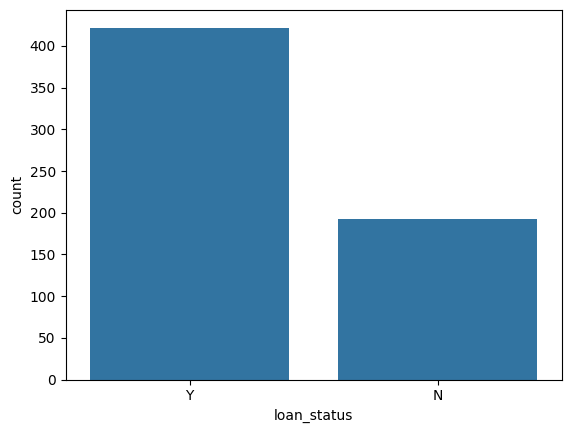

In [61]:
sns.countplot(x='loan_status',data=df)
plt.show()

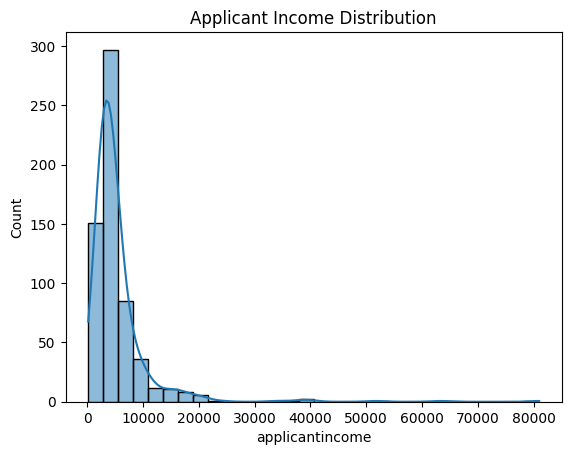

In [62]:
sns.histplot(df['applicantincome'],bins=30,kde=True)
plt.title("Applicant Income Distribution")
plt.show()


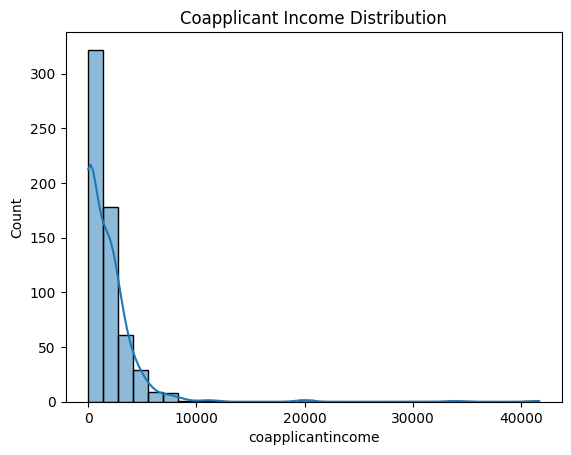

In [63]:
sns.histplot(df['coapplicantincome'], bins=30, kde=True)
plt.title("Coapplicant Income Distribution")
plt.show()


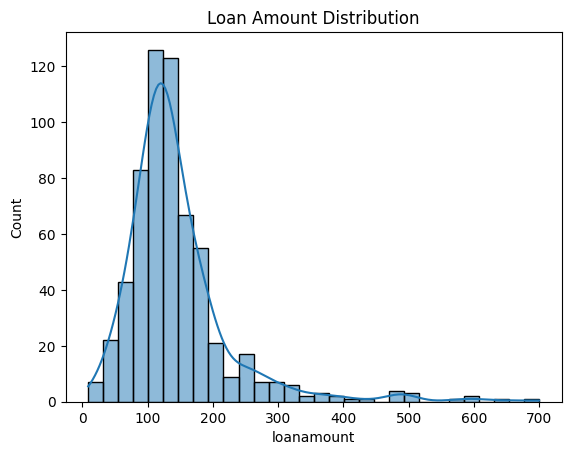

In [64]:
sns.histplot(df['loanamount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()


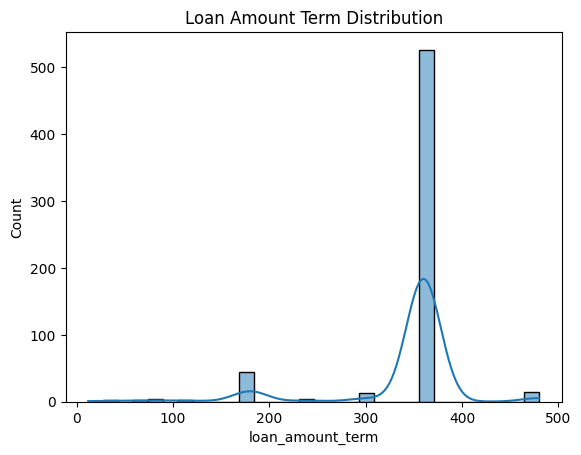

In [65]:
sns.histplot(df['loan_amount_term'], bins=30, kde=True)
plt.title("Loan Amount Term Distribution")
plt.show()


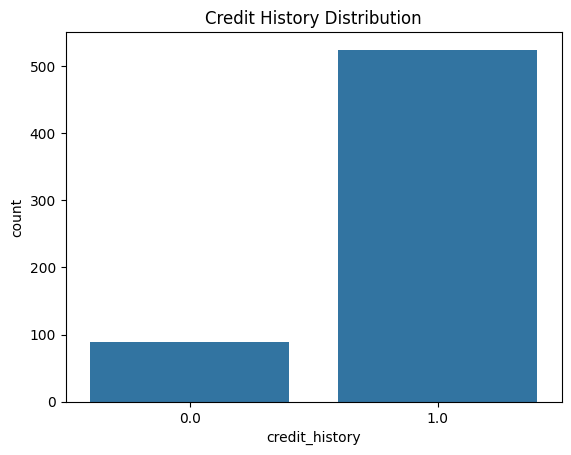

In [66]:
sns.countplot(x='credit_history', data=df)
plt.title("Credit History Distribution")
plt.show()


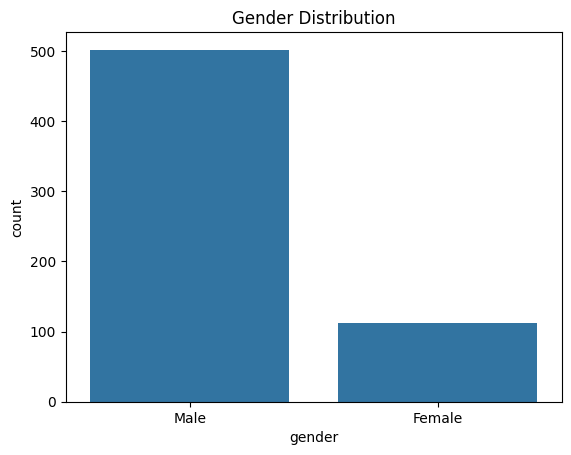

In [67]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


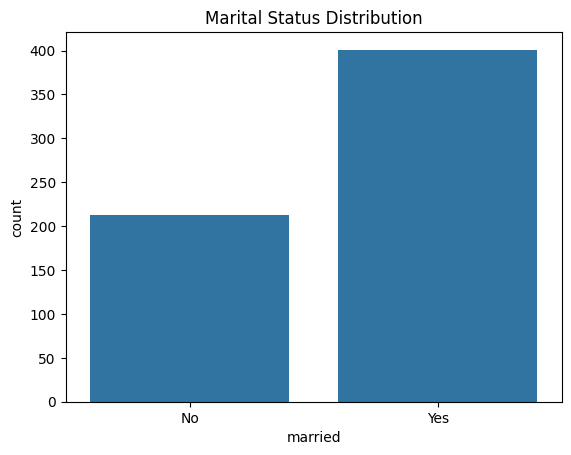

In [68]:
sns.countplot(x='married', data=df)
plt.title("Marital Status Distribution")
plt.show()


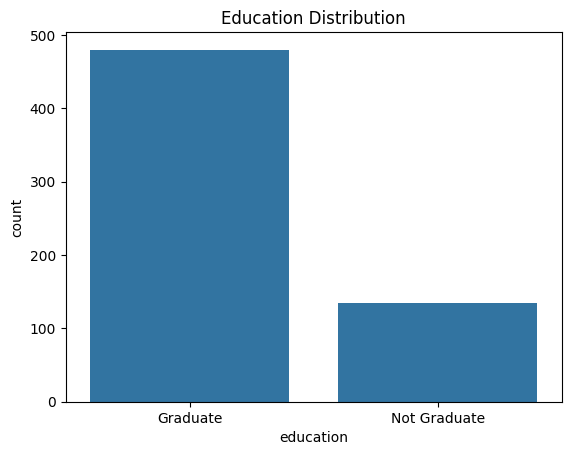

In [69]:
sns.countplot(x='education', data=df)
plt.title("Education Distribution")
plt.show()


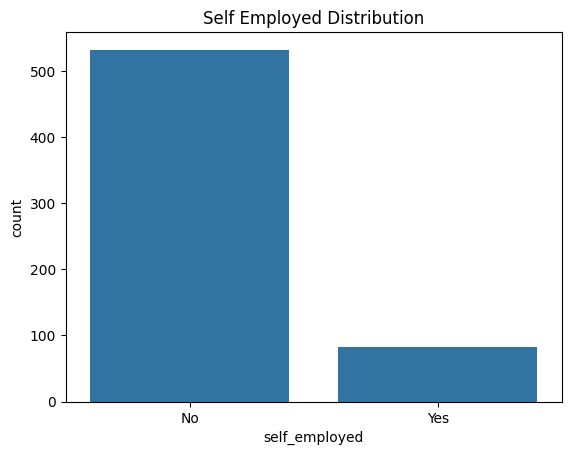

In [70]:
sns.countplot(x='self_employed', data=df)
plt.title("Self Employed Distribution")
plt.show()


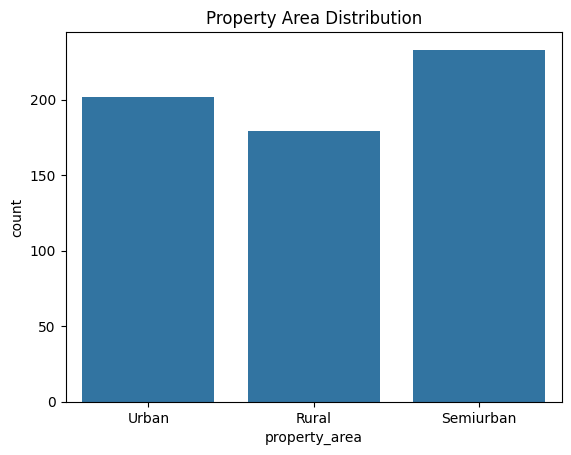

In [71]:
sns.countplot(x='property_area', data=df)
plt.title("Property Area Distribution")
plt.show()


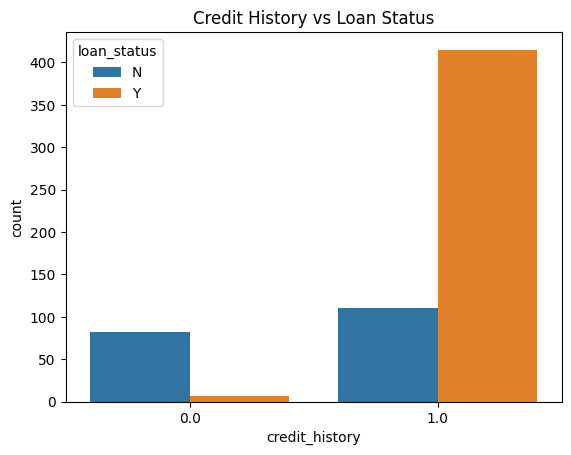

In [72]:
sns.countplot(x='credit_history', hue='loan_status', data=df)
plt.title("Credit History vs Loan Status")
plt.show()


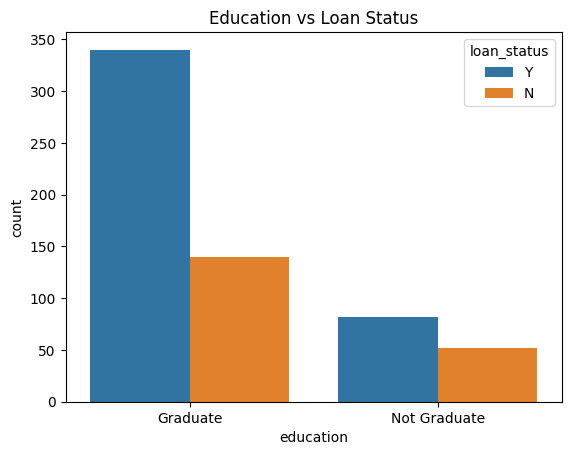

In [73]:
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Education vs Loan Status")
plt.show()


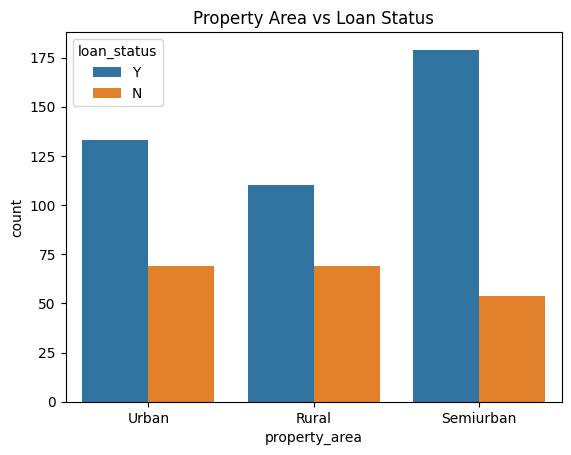

In [74]:
sns.countplot(x='property_area', hue='loan_status', data=df)
plt.title("Property Area vs Loan Status")
plt.show()


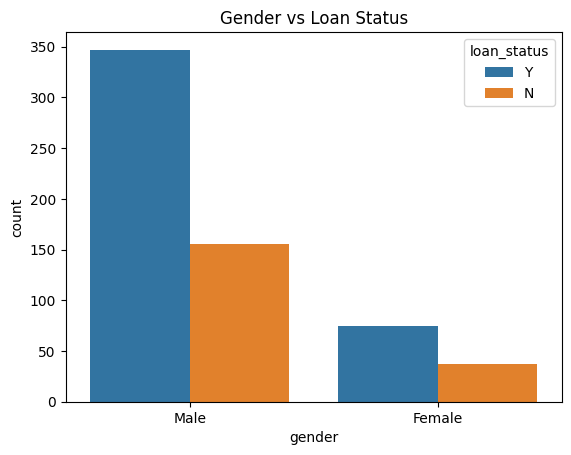

In [75]:
sns.countplot(x='gender', hue='loan_status', data=df)
plt.title("Gender vs Loan Status")
plt.show()


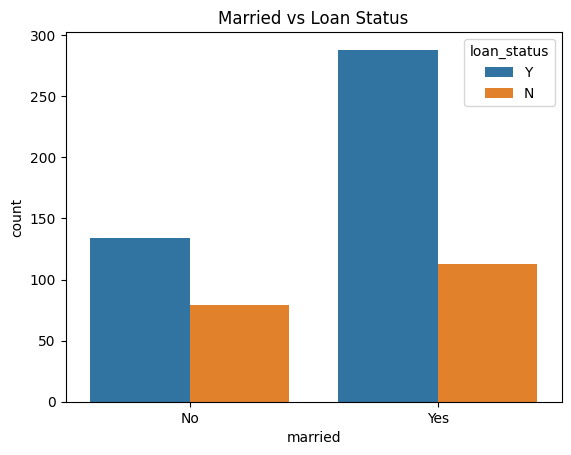

In [76]:
sns.countplot(x='married', hue='loan_status', data=df)
plt.title("Married vs Loan Status")
plt.show()


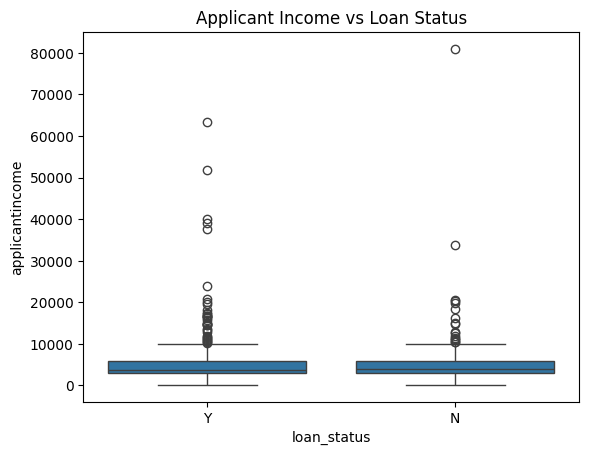

In [77]:
sns.boxplot(x='loan_status', y='applicantincome', data=df)
plt.title("Applicant Income vs Loan Status")
plt.show()


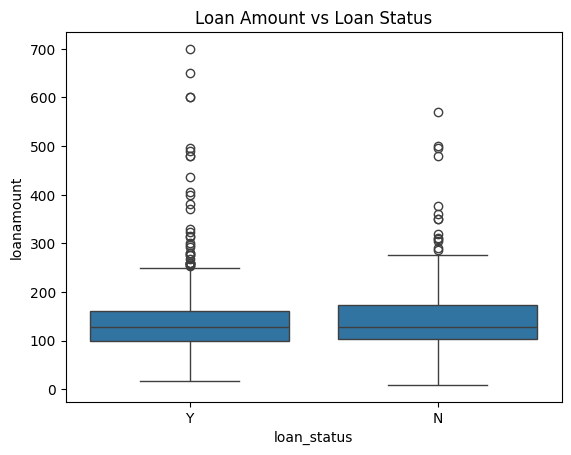

In [78]:
sns.boxplot(x='loan_status', y='loanamount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()


In [79]:
df_encoded = df.copy()

df_encoded['gender'] = df_encoded['gender'].map({'Male': 1, 'Female': 0})
df_encoded['married'] = df_encoded['married'].map({'Yes': 1, 'No': 0})
df_encoded['education'] = df_encoded['education'].map({'Graduate': 1, 'Not Graduate': 0})
df_encoded['self_employed'] = df_encoded['self_employed'].map({'Yes': 1, 'No': 0})
df_encoded['property_area'] = df_encoded['property_area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df_encoded['loan_status'] = df_encoded['loan_status'].map({'Y': 1, 'N': 0})


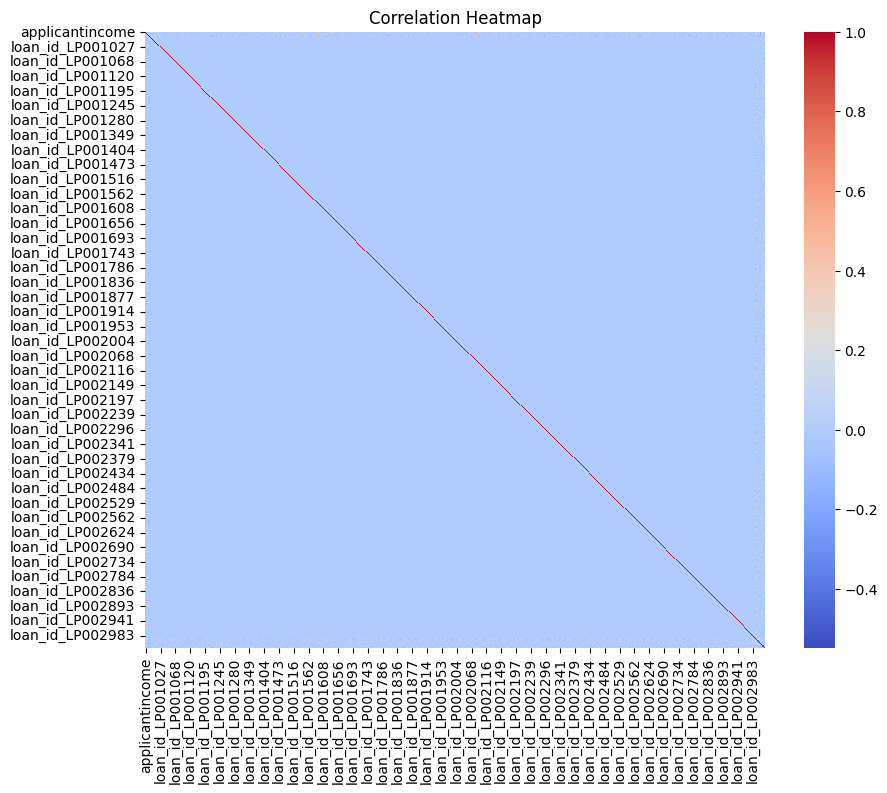

In [80]:

df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [81]:
## Exploratory Data Analysis (EDA) Summary


## Exploratory Data Analysis (EDA) Summary

### Key Observations

• The dataset contains 614 loan applicants with both numerical and categorical features.

• The target variable is loan_status, where approved loans are more frequent than rejected ones, indicating a slight class imbalance.

• Applicant income and loan amount distributions are right-skewed, with a few high-income and high-loan outliers.

• Most applicants have a positive credit history, which significantly increases the likelihood of loan approval.

• Education level and property area show noticeable influence on loan approval, with graduates and urban/semi-urban applicants having higher approval rates.

• Applicant income alone does not strongly differentiate approved and rejected loans, as both groups show overlapping income distributions.

• Correlation analysis reveals that credit history has the strongest positive correlation with loan approval, while income and demographic features show weak correlations.

Overall, credit history emerges as the most influential factor in loan approval decisions, while income and demographic attributes play a secondary role.
